### **Punto 1.1**

## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color Red
                    pixels[height-y-1,x] = (177 - count*multcol, 248, 73)
                    # color default Black
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels




Se realizo la modificacion de la funcion por f(z)=z**2, tambien tenemos que para esta función tiene una unica raíz en r1=0, tambien se realizo la modificacion del codigo de colores para poner uno para mayor contraste con el color negro.

Text(0, 0.5, 'f(x)')

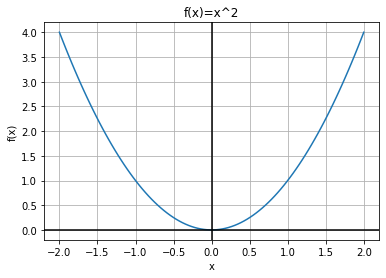

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')




## **Punto 2.1**

# *Método Clásico*

A continuación encontraremos la raíz de la ecuación f(z) = z**2 por el método de la ecuación cuadrática.

In [ ]:
import math 

a = float(1)
b = float(0)
c = float(0)

if a==0:
    print("El coeficiente a no puede ser igual a cero")
else:
    discriminante = b**2 - 4 * a * c
    if discriminante >= 0:
        if discriminante == 0:
            x = b / (2 * a)
            print("La raíz única es {:.3f}".format(x))
        else:
            x1 = (-b + math.sqrt(discriminante)) / (2 * a)
            x2 = (-b - math.sqrt(discriminante)) / (2 * a)
            print("La raíz real x1 es {:.3f}".format(x1))
            print("La raíz real x2 es {:.3f}".format(x2))
    else:
        discriminante = abs(discriminante)
        parteReal = -b / (2 * a)
        parteImaginaria = math.sqrt(discriminante) / (2 * a)
        print("La raíz compleja x1 es {:.3f} + {:.3f}i".format(parteReal, parteImaginaria))
        print("La raíz compleja x2 es {:.3f} - {:.3f}i".format(parteReal, parteImaginaria)) 

La raíz única es 0.000


Como podemos comprobar por el método clásico de la ecuación cuadratica r1=0.00

# *Método Po Shen Loh*

In [ ]:
import math
import numpy 

a = float(1)
b = float(0)
c = float(0)

Real = False 
b = b/a
c = c/a
disc = ((b**2)/4) - c
if disc < 0:
  disc = disc * -1
  Real = True 
  
r1 = -(b/2) + math.sqrt(disc)
string = "No real = " + str(NotReal)
print("r1 = ",r1)




r1 =  0.0


### **Punto 3.1**

In [ ]:
def display1(z_c_r=0, z_c_i=0, zh = 1/100, zw=1/100, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Realice una escala en el display de 1/100, poque el fractal a escala 1 es muy pequeño y por lo tanto al realizar una escala de alejamiento "Zoom Out" no se aprecia el cambio de la misma nada. 

zoom out
Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


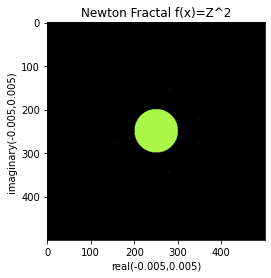

Z region from ( -0.01 , -0.01 ) to ( 0.01 , 0.01 )


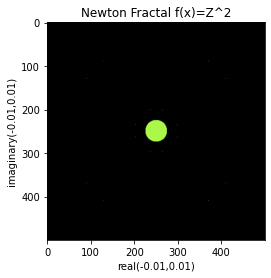

Z region from ( -0.015 , -0.015 ) to ( 0.015 , 0.015 )


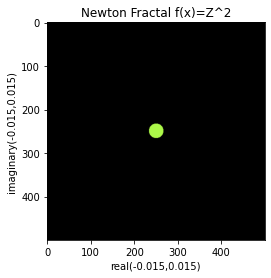

Z region from ( -0.02 , -0.02 ) to ( 0.02 , 0.02 )


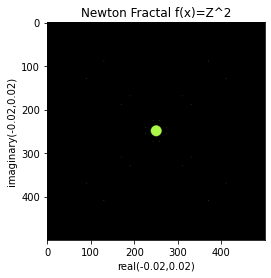

Z region from ( -0.025 , -0.025 ) to ( 0.025 , 0.025 )


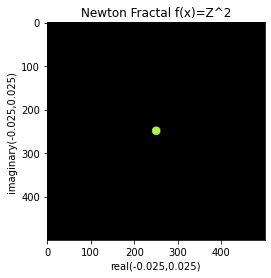

In [ ]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

Defini un nuevo display 2 para visualizar el fractar sin cambiar la escala inicial zoom=1, dado que en este caso vamos a realizar un acercamiento hacia el fractal, es decir vamos a reducir la escala "Zoom In" para visualizar el fractal en mas detalle

In [ ]:
def display2(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


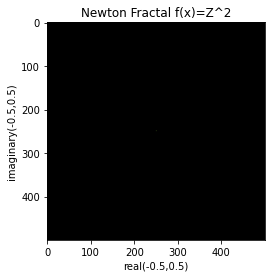

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


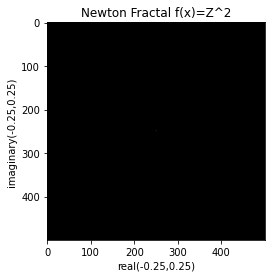

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


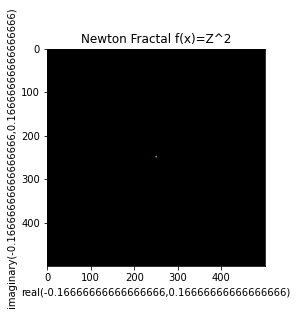

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


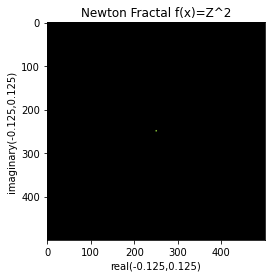

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


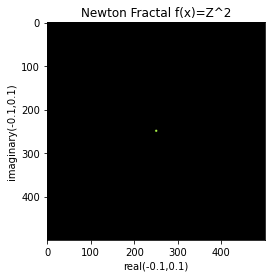

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


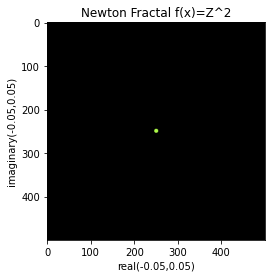

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


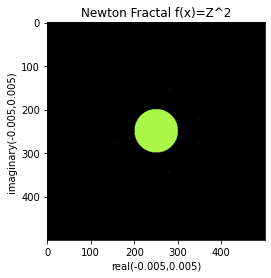

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


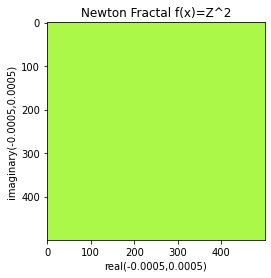

In [ ]:
print("zoom in")
display2(zoom=1)
display2(zoom=1/2)
display2(zoom=1/3)
display2(zoom=1/4)
display2(zoom=1/5)
display2(zoom=1/10)
display2(zoom=1/100)
display2(zoom=1/1000)

## **Punto 4.1**

## Newton iterates form z=10.0 + 0.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=10.0 +0.0j. 

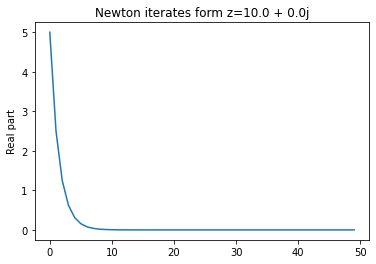

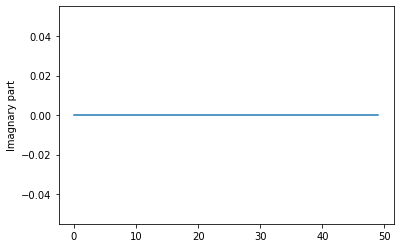

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Visualizamos que la parte real de f(z) decrece en las primeras 10 iteraciones hasta estabilizarse en un valor de 0, lo cual concuerda con la raiz encontrada por el metodo de Newton-Rapson r1=0. En cuanto a la raíz imaginaria podemos ver que tiende a 0 como es de esperarse pues nuestra función no tiene raices imaginarias.

## Newton iterates form z=-10.0 + 0.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=-10.0 +0.0j.


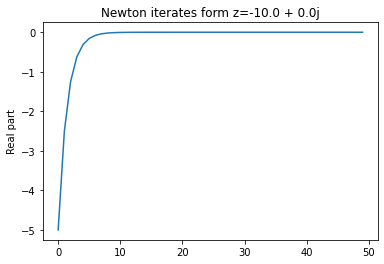

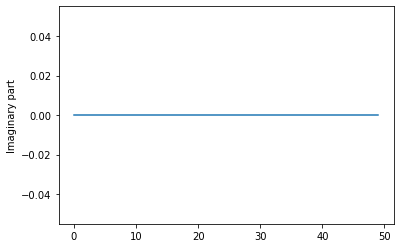

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Visualizamos que la parte real de f(z) crece en las primeras 10 iteraciones hasta estabilizarse en un valor de 0, lo cual concuerda con la raiz encontrada por el metodo de Newton-Rapson r1=0. En cuanto a la raíz imaginaria podemos ver que tiende a 0 como es de esperarse pues nuestra función no tiene raices imaginarias

## Newton iterates form z=0.0 + 10.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=0.0 + 10.0j.

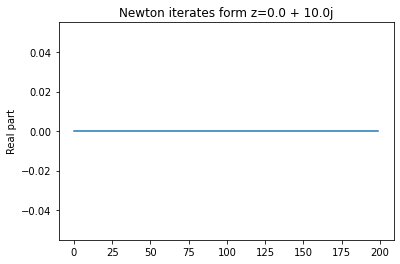

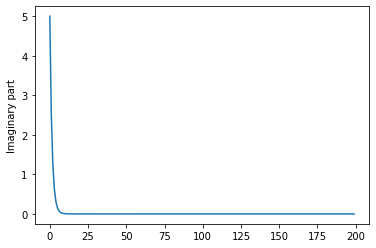

In [ ]:
z=0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Visualizamos que la parte real de f(z) es 0 pues no tiene que iterar hasta alcanzar el valor de su raíz puesto que r1=0 lo cual concuerda con la raiz encontrada por el metodo de Newton-Rapson. En cuanto a la raíz imaginaria en este caso podemos ver que decrece durante las primeras 10 iteraciones hasta estabilizarse en un valos 0.0j, lo es adecuado pues nuestra función f(z) no tiene raices imaginarias. 

## Newton iterates form z=0.0 - 10.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=0.0 - 10.0j.

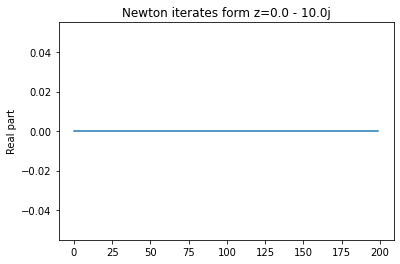

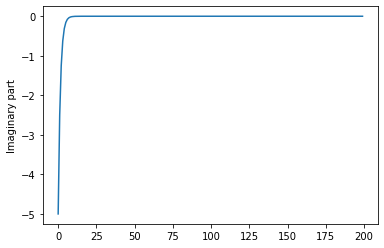

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Visualizamos que la parte real de f(z) es 0 pues no tiene que iterar hasta alcanzar el valor de su raíz puesto que r1=0 lo cual concuerda con la raiz encontrada por el metodo de Newton-Rapson. En cuanto a la raíz imaginaria en este caso podemos ver que crece durante las primeras 10 iteraciones hasta estabilizarse en un valos 0.0j, lo es adecuado pues nuestra función f(z) no tiene raices imaginarias

## **Punto 5.1**

## Newton iterates form z=0.0 + 0.0j

En este caso vamos a realizar las iteraciones para la función f(z) para un Z=0.0 - 0.0j.

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(10):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

NameError: ignored

En este caso se genera un error al intentar graficar f(z) pues tenemos que dz tiende a dz=0 desde la primera iteración por lo cual se genera un error al pues como sabemos la división por cero no se encuentra definida matematicamente.